In [128]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

In [129]:
#Data cleaning

# Reading whale returns
whale_returns_csv = Path("whale_returns.csv")
whale = pd.read_csv(whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale.sort_index(inplace=True)
whale.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [130]:
# Count nulls
whale.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [131]:
# Drop nulls
whale = whale.dropna()

In [132]:
whale.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [133]:
# Reading algorithmic returns
algo_returns_csv = Path("algo_returns.csv")
algo_data = pd.read_csv(algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_data.sort_index(inplace=True)
algo_data.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [134]:
# Count nulls
algo_data.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [135]:
# Drop nulls
algo_data = algo_data.dropna()

In [136]:
#Count nuls again after dropping
algo_data.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [137]:
#  S&P 500 Returns
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("sp500_history.csv")
sp500_data = pd.read_csv(sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_data.sort_index(inplace=True)
sp500_data.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [138]:
# Check Data Types
sp500_data.dtypes

Close    object
dtype: object

In [139]:
# Fix Data Types

# Strip out the $ with str.replace('$', '') and then us df.astype('float')

sp500_data['Close'] = sp500_data['Close'].str.replace('$', '').astype('float')

sp500_data.dtypes

Close    float64
dtype: object

In [140]:
 # Calculate the daily return using the 'pct_change()' function
daily_returns = sp500_data.pct_change()
daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [141]:
# Drop nulls
daily_returns = daily_returns.dropna()

# Confirm nulls are gone
daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [142]:
# Rename Column
daily_returns = daily_returns.rename(columns={
    "Close": "S&P 500"
})

daily_returns.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [143]:
# Concatenate all DataFrames into a single DataFrame
combined_all = pd.concat([whale, algo_data, daily_returns], axis='columns', join='inner')
combined_all

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


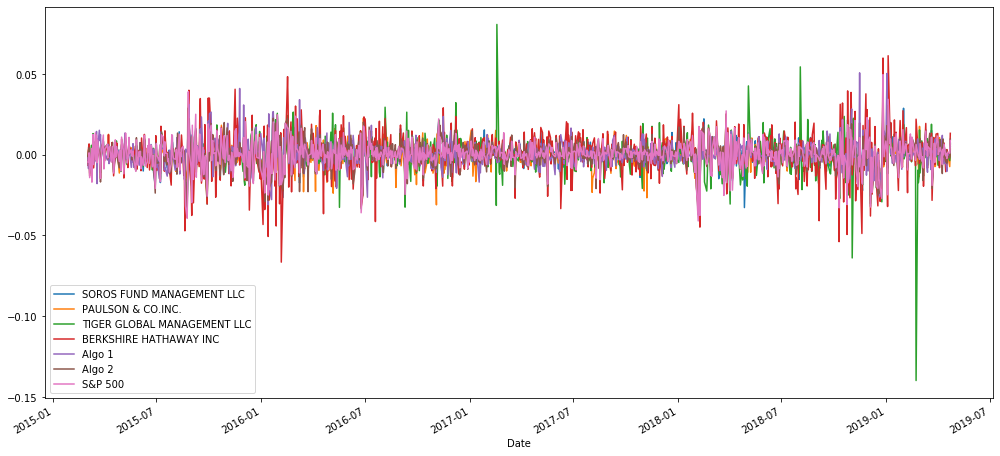

In [145]:
# H1 PORTFOLIO ANALYSIS
# H2 PERFORMANCE

# Plot the daily returns of the S&P 500 over the last 5 years
combined_all.plot(figsize=(17,8))

# Slice DataFrame into 5 year timeframe
#daily_return_5_year = combined_data.loc['2015-07-01':'2019-01-30'].plot(figsize=(12,5))


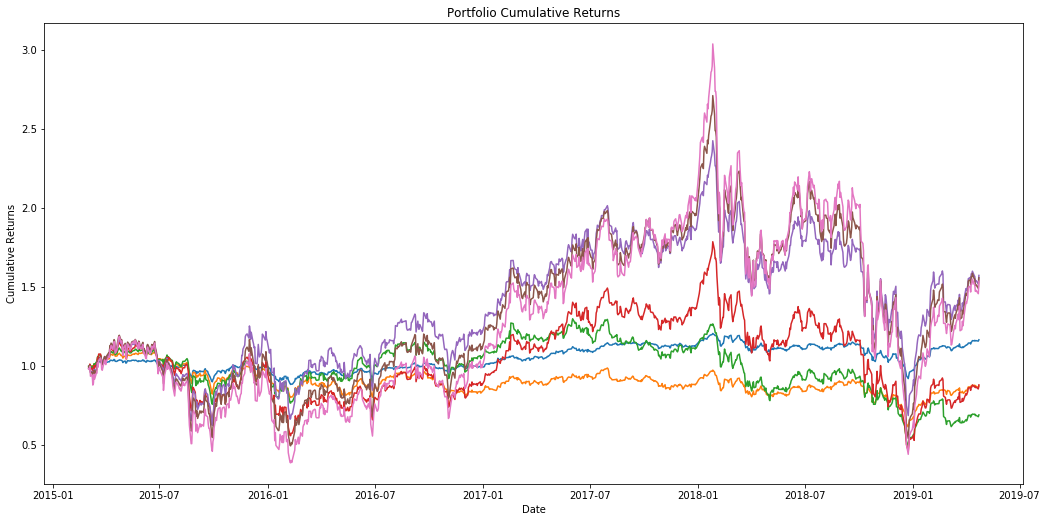

In [146]:
# Plot cumulative returns

#load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

port_ret = combined_all.cumsum(axis=1)
# axis =1 tells pandas we want to add


cumulative_ret = (port_ret + 1).cumprod()

fig = plt.figure(figsize=(17,8))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(cumulative_ret)
ax1.set_xlabel('Date')
ax1.set_ylabel("Cumulative Returns")
ax1.set_title("Portfolio Cumulative Returns")
plt.show()

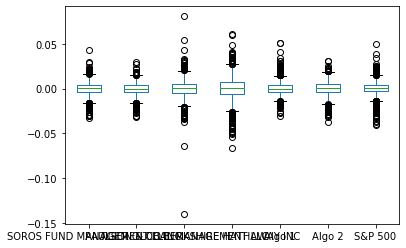

In [147]:
#RISK
# Box plot to visually show risk
combined_all.plot.box()

In [148]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
daily_std = combined_all.std()
daily_std.head(7)

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

In [149]:
# Determine which portfolios are riskier than the S&P 500
# I couldn't figure this one out.

In [150]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std.head(7)

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

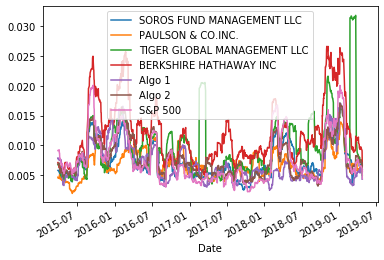

In [151]:
# ROLLING STATISTICS
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window

# Plot a rolling 21-day std dev of the S&P 500's and whale
combined_all.rolling(window=21).std().plot()


In [152]:
# Construct a correlation table
# Use the `corr` function on the combined DataFrame to calculate and output a correlation table

correlation = combined_all.corr()
correlation


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


In [153]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)

# Calculate covariance of all daily returns of BERKSHIRE HATHAWAY INC vs. S&P 500
covariance = combined_all['BERKSHIRE HATHAWAY INC'].cov(daily_returns['S&P 500'])
covariance

8.302834941861689e-05

In [154]:
# Calculate variance of all daily returns of BERKSHIRE HATHAWAY INC vs. S&P 500
variance = combined_all['S&P 500'].var()
variance

7.316632424648712e-05

In [191]:
 # Calculate beta of all daily returns of Berkshire
berkshire_beta = covariance / variance
berkshire_beta

1.1347891297491723

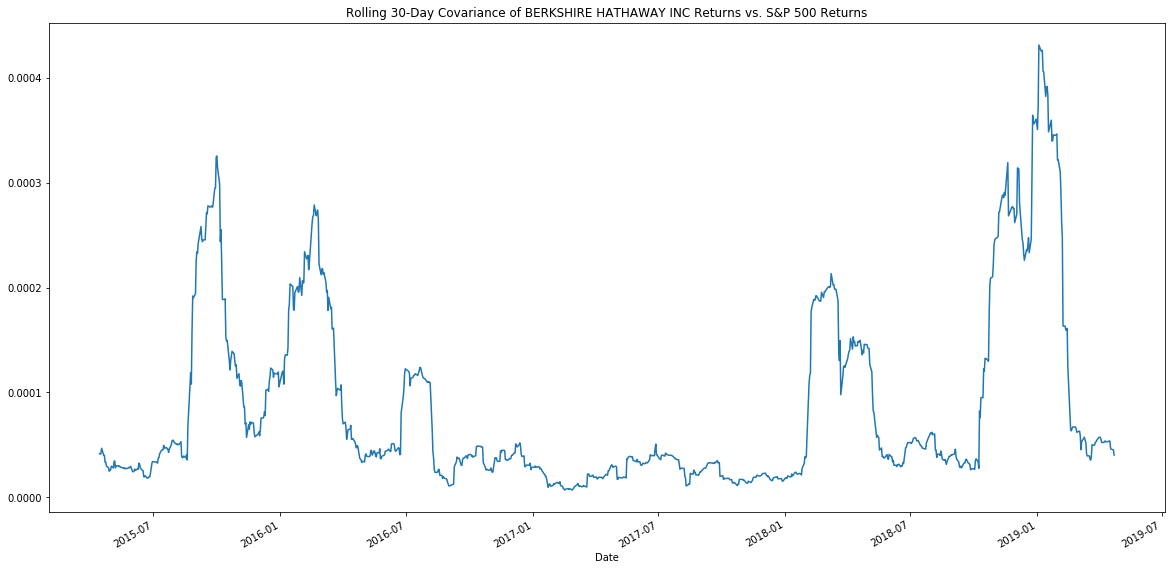

In [156]:
# Calculate 30-day rolling covariance of BERKSHIRE HATHAWAY INC vs. S&P 500 and plot the data
rolling_covariance = combined_all['BERKSHIRE HATHAWAY INC'].rolling(window=30).cov(combined_all['S&P 500'])
rolling_covariance.plot(figsize=(20, 10), title='Rolling 30-Day Covariance of BERKSHIRE HATHAWAY INC Returns vs. S&P 500 Returns')

In [157]:
# Calculate a rolling window using the exponentially weighted moving average. 
# YOUR CODE HERE

In [158]:
# Calculate annualized Sharpe Ratios
# Calculate Sharpe Ratio
sharpe_ratios = (combined_all.mean() * 252) / (combined_all.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

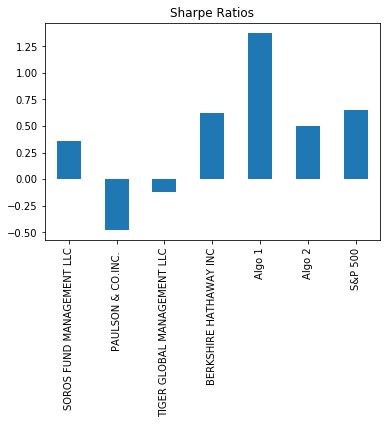

In [159]:
 # Plot sharpe ratios
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

In [160]:
# Visit Google Sheets and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
# I download the data as CSV file 02-Homework_my_portfolio_google_finance_function
# I'm calculating the returns for each stock

import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

In [161]:
 # Use the Pathlib libary to set the path to the CSV
csvpathAZN = Path("my_portfolio_google_finance_functionAZN.csv")
csvpathINO = Path("my_portfolio_google_finance_functionINO.csv")
csvpathMRNA = Path("my_portfolio_google_finance_functionMRNA.csv")

In [162]:
# Read the first stock
azn_df = pd.read_csv(csvpathAZN)

# Use the `insert` function to randomly generate 'AZN'down this new column
azn_df.insert(0, 'Symbol', 'AZN' )

#rename the columns, g-d knows why
azn_df = azn_df.rename(columns={
    "Close": "NOCP",
    "Date": "Trade DATE"
})

 # Use a list of re-ordered column names to alter the column order of the original DataFrame
azn_df = azn_df[["Trade DATE", "Symbol", "NOCP"]]

azn_df.head()


,Trade DATE,Symbol,NOCP
0,1/2/2020 16:00:00,AZN,50.39
1,1/3/2020 16:00:00,AZN,50.09
2,1/6/2020 16:00:00,AZN,49.88
3,1/7/2020 16:00:00,AZN,50.07
4,1/8/2020 16:00:00,AZN,49.95


In [163]:
# Read the second stock
ino_df = pd.read_csv(csvpathINO)

# Use the `insert` function to randomly generate 'AZN'down this new column
ino_df.insert(0, 'Symbol', 'INO' )

#rename the columns, g-d knows why
ino_df = ino_df.rename(columns={
    "Close": "NOCP",
    "Date": "Trade DATE"
})

 # Use a list of re-ordered column names to alter the column order of the original DataFrame
ino_df = ino_df[["Trade DATE", "Symbol", "NOCP"]]

ino_df.head()

,Trade DATE,Symbol,NOCP
0,1/2/2020 16:00:00,INO,3.21
1,1/3/2020 16:00:00,INO,2.98
2,1/6/2020 16:00:00,INO,3.14
3,1/7/2020 16:00:00,INO,3.15
4,1/8/2020 16:00:00,INO,3.14


In [164]:
# Read the third stock
mrna_df = pd.read_csv(csvpathMRNA)

# Use the `insert` function to randomly generate 'AZN'down this new column
mrna_df.insert(0, 'Symbol', 'MRNA' )

#rename the columns, g-d knows why
mrna_df = mrna_df.rename(columns={
    "Close": "NOCP",
    "Date": "Trade DATE"
})

 # Use a list of re-ordered column names to alter the column order of the original DataFrame
mrna_df = mrna_df[["Trade DATE", "Symbol", "NOCP"]]

mrna_df.head()

,Trade DATE,Symbol,NOCP
0,1/2/2020 16:00:00,MRNA,19.23
1,1/3/2020 16:00:00,MRNA,18.89
2,1/6/2020 16:00:00,MRNA,18.13
3,1/7/2020 16:00:00,MRNA,17.78
4,1/8/2020 16:00:00,MRNA,17.98


In [173]:
# Concatenate the three DataFrames by rows and perform an inner join
vaccine_makers = pd.concat([azn_df, ino_df, mrna_df], axis="rows", join="inner")

# Reset
vaccine_makers = vaccine_makers.reset_index()

# Pivot so that each column of prices represents a unique symbol
vaccine_makers = vaccine_makers.pivot_table(values='NOCP', index='Trade DATE', columns='Symbol')

vaccine_makers.head()

Symbol,AZN,INO,MRNA
Trade DATE,,,
1/10/2020 16:00:00,49.85,3.11,19.14
1/13/2020 16:00:00,49.67,3.31,20.26
1/14/2020 16:00:00,50.18,3.29,20.00
1/15/2020 16:00:00,50.80,3.35,20.24
1/16/2020 16:00:00,50.51,3.40,21.01


In [174]:
# Calculate Daily Returns
all_returns = vaccine_makers.pct_change()

# Drop nulls
all_returns = all_returns.dropna()

all_returns.head()

Symbol,AZN,INO,MRNA
Trade DATE,,,
1/13/2020 16:00:00,-0.003611,0.064309,0.058516
1/14/2020 16:00:00,0.010268,-0.006042,-0.012833
1/15/2020 16:00:00,0.012356,0.018237,0.012000
1/16/2020 16:00:00,-0.005709,0.014925,0.038043
1/17/2020 16:00:00,0.016234,-0.032353,-0.018563


In [167]:
# Calculate weighted portfolio returns
azn_weight = 1/3
ino_weight = 1/3
mrna_weight = 1/3

portfolio_returns = azn_weight * all_returns["AZN"] + ino_weight * all_returns["INO"] + mrna_weight * all_returns["MRNA"]
portfolio_returns.head()

Trade DATE
1/13/2020 16:00:00    0.039738
1/14/2020 16:00:00   -0.002869
1/15/2020 16:00:00    0.014198
1/16/2020 16:00:00    0.015753
1/17/2020 16:00:00   -0.011560
dtype: float64

In [197]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
custom_whale = pd.concat([combined_all, all_returns])

custom_whale.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,AZN,INO,MRNA
2015-03-03 00:00:00,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,NaN,NaN,NaN
2015-03-04 00:00:00,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,NaN,NaN,NaN
2015-03-05 00:00:00,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,NaN,NaN,NaN
2015-03-06 00:00:00,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,NaN,NaN,NaN
2015-03-09 00:00:00,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,NaN,NaN,NaN


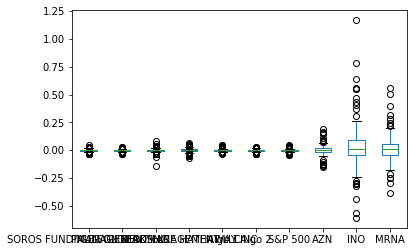

In [198]:
#RISK
# Box plot to visually show risk
custom_whale.plot.box()

In [199]:
# Calculate annualized Sharpe Ratios
# Calculate Sharpe Ratio
sharpe_ratios = (custom_whale.mean() * 252) / (custom_whale.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
AZN                            0.571823
INO                            2.671855
MRNA                           2.080649
dtype: float64

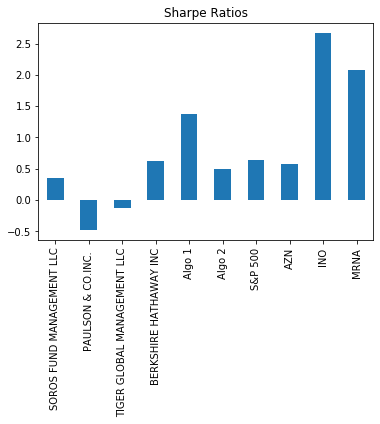

In [200]:
# Plot sharpe ratios
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

In [201]:
# Create a correlation analysis
correlation = custom_whale.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,AZN,INO,MRNA
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864,NaN,NaN,NaN
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732,NaN,NaN,NaN
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946,NaN,NaN,NaN
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371,NaN,NaN,NaN
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494,NaN,NaN,NaN
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764,NaN,NaN,NaN
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000,NaN,NaN,NaN
AZN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.047709,0.463031
INO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.047709,1.000000,0.330762
MRNA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.463031,0.330762,1.000000


In [202]:
# Calculate Beta for this custom whale portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)

# Calculate covariance of all daily returns of MY CUSTOM WHALE vs. S&P 500
covariance = custom_whale['MRNA'].cov(daily_returns['S&P 500'])
covariance

nan

In [203]:
# Calculate variance of all daily returns of BERKSHIRE HATHAWAY INC vs. S&P 500
variance = custom_whale['S&P 500'].var()
variance

7.316632424648712e-05

In [204]:
# Calculate beta of all daily returns of your Custom Whale
beta = covariance / variance
beta

nan